In [4]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

### Introductions

Jimmy (Rick Starr's Lab) - Looking at fish counts

### Focus questions
1. Give examples of situations where the following distributions are an appropriate model for observed data:
  - Poission
  - Weibull
  - log-normal

2. Describe a situation where the central limit theorem can be applied to use statistics based on normal distributions, when population being sampled is non-normal

## Review
- Ordinal: Hurricane scale;
- Nominal: species classification
- Scale
  - Interval: Zero point is arbitrarily defined
  - Ration: Things with a Natural zero point, Kelvin scale, length, mass

#### Error types
- Measurement Errors
  - Systematic - Instrument Drift
  - Random
- Other types of Errors
  - Computational errors: rounding
    - Numerical errors: Approximations with limited Computational resources
      - Round-off, truncation
  - Data errors: garbage in - garbage out
  - Errors from previous computations
  - Modeling errors


## Probability Density functions

__Probability Functions__

P(x) = probability density function<br>
 The probability an number coming up on a dice role
F(x) = Cumulative Probability Function

__Mutiplications Principle__ - If two events are unrelated, the probability of joint occurrence (both events happening) is multiplication of two probabilities

$P(A,B)  = p(b)p(A)$<br>

__Additive principle__ - Probability of one event or another mutually exclusive event is the sum of the probabilities <br>
$P(A|B) = P(C) + P(D)$


## Distributions

### Normal Distribution

<img src="images/norm_dist_rule.png" width="450">
[Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Empirical_Rule.PNG)


* __Mean__ - 1st moment
* __Variance__ - 2nd moment
* __Skew__ - 3rd moment, Describes the spread (Normal Distribution, skew = 0)
* __Kurtosis__ - 4th moment, Describes how pointy the distribution is. Low value would be flat (compared to a Normal distribution (k=3))

### Non-normal distribution 
__Example: Life expectancy__<br>
<div style="float: left;" width ="1000">
    <img src="images/life_expectancy_1.png" style="float: left;" width="50%"><img src="images/life_expectancy_2.png" width="50%" style="float: right;">
</div>
source: http://www.cureffi.org/2013/06/19/how-censoring-by-life-expectancy-affects-age-of-onset-distributions/
Negative skew towards later life (spike at birth)

__Poisson Distribution__
  * Often used as a model for count data
  * Assumptions:
    * One event does not affect the probability of the next (they are independent)
    * Events cannot occur in the same time and place in the interval
    * Events occur at a constant rate<br>

    k = # of events counted per interval (ie floods per century)<br>
    $\lambda$ = expected values, true mean
    
     P(k events per interval) = $ \lambda e^-\lambda /k! $

    Count uncertainty  = $\sqrt{k}$ - More counts => less uncertainty

__example__: if on average 10 flood occur per century. What is probability of counting 15 floods occuring in a centry?

Probability of 15 floods in a century: 0.03475408547625957


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in power


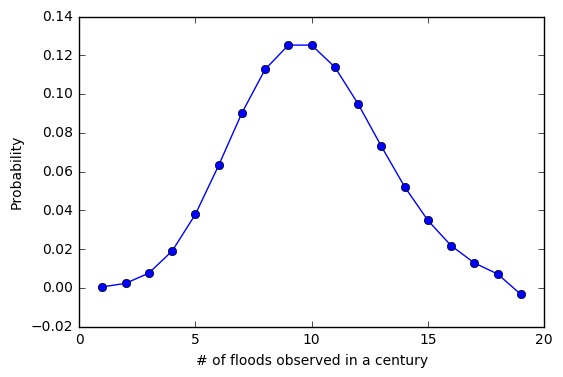

In [18]:
# Poisson Distribution

e = 2.718 #Eulers number approximation
k = 15 # number floods in a century that we we want to estumate
lam = 10 # The mean number of floods in a century counted
prob_15 = (10**15 * e**(-1*lam)) / math.factorial(k)
print("Probability of 15 floods in a century:",prob_15)

# Modeling
x = np.arange(1,20,1) # A range of possible floods
vec_fac = np.vectorize(math.factorial) # function doesn't natively accept numpy arrays
p = (10**x * e**(-1*lam)) / vec_fac(x)

# Plotting the model
fig, ax = plt.subplots()
ax.plot(x,p,marker='o')
ax.set_xlim(0,20)
ax.set_ylabel('Probability')
ax.set_xlabel('# of floods observed in a century')


__Weibull Distribution__ - A theoretical distribution that is often fit to wind speed data

<img src="images/weibull.png" width="600" align='center'>
Credit: http://www.wind-powemr-program.com/wind_statistics.htm
* Skewed: wind speed can sometimes be very high but not negative
* Useful for planning wind energy projects


__Log-Normal Distribution__ - Transformed log data is normally distributed
<img src="images/log_normal.png" width="600" align='center'>
source: Landry, M.R. and B.M. Hickey (eds.) (1989) Coastal Oceanography of Washington and
Oregon, 607 pp., Elsevier Science, Amsterdam, The Netherlands.

### Back to Normal Distributions
__Random instrument error is often normally distributed__
<img src='images/instr_error_dist.png' width='600'>
source: T. Connolly

Error is defined as: $T_{sat} - T_{mooring}$ units of [C]

Mean of error tends to be Zero
If error is randomly distributed - __accurate__, ie not biased

Normal Distributions can be "standardized", where the
* mean = 0
* standard deviation = 1
* Unitless

__Z-score__: $ Z_i = x_i - \bar{x} / S $

Helpful for identifying outliers (large Z-scores)
* Typical outlier:  Z-score = +/- 3


$ 1 - \alpha$  :  The probability that a value will be less than $\alpha = 0.025$

__Characterizing the true mean with confidence intervals__
Use Student's T distrubtion: <br>
$ t = \frac{\bar{x} - \mu} { S \sqrt{1/N}}$

* Generally less kurtosis than the normal distribution
* Converges on a Normal distribution as the degrees of freedom, $\nu $, approches infinity

Confidence intervals for the represent the true mean:

### $$ \frac{ \bar{x} - t_{1-\alpha}} {\frac{S} {\sqrt{N}}} < \mu < \frac{ \bar{x} + t_{1-\alpha}} {\frac{S} {\sqrt{N}}} $$ ###

Nitrate Profile example 

In [22]:
dNO3 = np.array([3.25,0.43,-.17,3.89])
mean_nitrate = np.mean(dNO3)
std_nitrate = np.std(dNO3,ddof=1)
n_nitrate = len(dNO3)

alpha = 3.182
ci = (mean_nitrate - alpha) / (std_nitrate * np.sqrt(1/n_nitrate))

print('mean:',mean_nitrate)
print('# of Samples:',n_nitrate)
print('Std:',round(std_nitrate,3))
print('95% confidence:',round(ci,2))

mean: 1.85
# of Samples: 4
Std: 2.018
95% confidence: -1.32


### Probability density function for the __$\chi^2$__ distribution 
Describes the how well you know the true standard deviation 

Calculating the chi-square confidence intervals:
### $ \frac{(N -1) S^2}{\chi^2 _{\alpha}} < \sigma^2 <  \frac{(N -1) S^2}{\chi^2 _{1 - \alpha}} $ ###

Values are not symetric
### $ \chi^2_\alpha \ne \chi^2_{1-\alpha} $ ###

Nitrate example

In [23]:
alpha = .352
upper_ci = ((n_nitrate - 1) *(std_nitrate**2))/9.35
lower_ci = ((n_nitrate - 1)* (std_nitrate**2))/ .216
print('variance:',s**2)
print('lower:',lower_ci)
print('upper:',upper_ci)

variance: 4.0728
lower: 56.5666666667
upper: 1.30678074866


### Python - Tutorials
<img src='images/python_stack.png' width='600'>
Source: T. Connolly

__The python stack.__

Packages are collections of python code
Numpy - Numerical computing
SciPy - Stats, timeseries 
Matplotlib - Plotting and figure making
Other Packages:
   * Pandas: Data anlysis
   * Basemap: Map making working with geodata
   * xarray: 3D data

in bash: 'python' 'ipython' 

[Bash methods](https://ss64.com/bash/) - Note: Not all will work in Git-Bash

Common commands:

* ls - list files and directories from current 
* cd - change directory
* pwd - list the present working directory
* cp - copy a file to another locations ex cp data.txt documents , would copy a file in the current 
* mkdir - make a new directory
* .. - the parent directory